### Desarrolla dos modelos de redes de perceptrón multicapa, como ya sabes, ambas con estructura secuencial. Para ello cogeremos dos dataset: digits dataset y wine dataset.

In [2]:
# !pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine, load_digits
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

#### Entrenamiento del dataset Wine

In [3]:
# === Carga y preprocesamiento de datos (wine) ===

# Cargar datos
wine = load_wine()
X = wine.data
y = wine.target

# Encodeamiento de las variables categóricas a predecir
y = tf.keras.utils.to_categorical(y, 3) # En este caso las clases a predecir son 3 tipos de vinos (3 clases)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dimension de los datos de entrada: ", X_train[0].size)

# Preprocesamiento
# Estandarizamos los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Preprocesamiento mediante capa e Integer encoding
# Normalizador de variables categóricas
# encoder = LabelEncoder()
# Capa de normalización
# normalizer = Normalization()

# "Adaptación" del normalizador a los datos de entrenamiento
# normalizer.adapt(X_train)
# Codificación de las variables categóricas a predecir
# y_train = encoder.fit_transform(y_train)
# y_test = encoder.transform(y_test)

Dimension de los datos de entrada:  13


c:\Users\SergioSF\Desktop\Programacion de Modelos de IA\Ejercicios y apuntes\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 255 (1020.00 B)

 Trainable params: 255 (1020.00 B)

 Non-trainable params: 0 (0.00 B)

Precisión (Sequential): 0.92


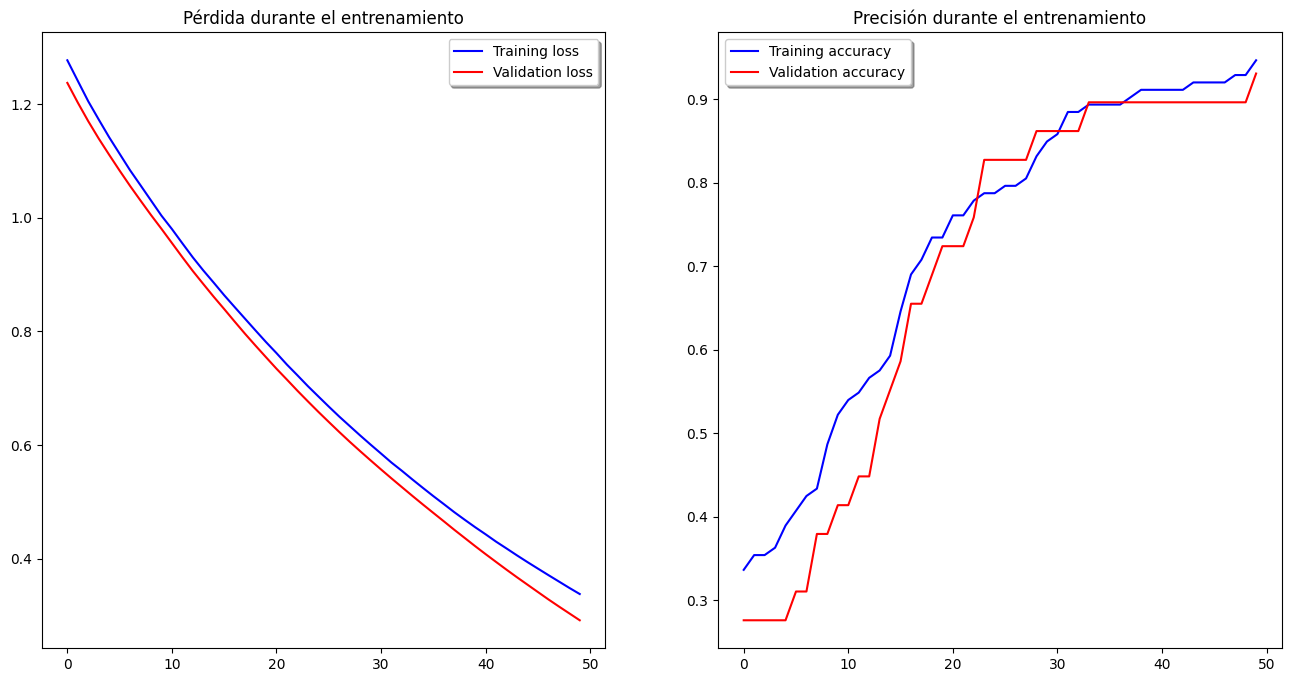


Entrada #0: [ 0.80873338  0.63731874  0.71578579 -1.24128036  1.06556722  0.64663669
  1.02724237 -1.54932094  0.08936053  0.01825223  0.01551695  1.06613421
  0.36548715]
Etiqueta real: 0
Etiqueta predicha: 0
Correcto


In [4]:
# === Definición del modelo ===
model = Sequential([
    Dense(10, activation='relu', input_shape=(13,)), # Importante ajustar las dimensiones de los datos de entrada 
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')  # 3 clases
])

# Mostrar resumen del modelo
model.summary()

# === Compilación y entrenamiento ===
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)

# === Evaluación ===
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión (Sequential): {accuracy:.2f}")

# === Gráficos del entrenamiento ===
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pérdida
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title('Pérdida durante el entrenamiento')

# Precisión
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Precisión durante el entrenamiento')

plt.show()

# === Predicción de un ejemplo concreto ===
i = 0
predictions = model.predict(X_test, verbose=0)

# Entrada
print(f"\nEntrada #{i}: {X_test[i]}")

# Etiqueta real
real = np.argmax(y_test[i])
print(f"Etiqueta real: {real}")

# Predicción
pred = np.argmax(predictions[i])
print(f"Etiqueta predicha: {pred}")

# Verificación
print("Correcto" if pred == real else "Incorrecto")

#### Entrenamiento del dataset Digits

In [3]:
# === Carga y preprocesamiento de datos (digits) ===

# Cargar datos
digits = load_digits()
X = digits.data
y = digits.target

# Encodeamiento de las variables categóricas a predecir
y = tf.keras.utils.to_categorical(y, 10) # En este caso las clases a predecir son los números del 0 al 9 (10 clases)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dimension de los datos de entrada: ", X_train.shape)


# Preprocesamiento
# En este caso ya que nuestros datos de entrada son imagenes las dividimos por 255 (escala de blanco negro) para obtener valores entre 0 y 1.
# X_train = X_train / 255.0
# X_test = X_test / 255.0

# Estandarizamos los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Preprocesamiento mediante capa e Integer encoding
# Normalizador de variables categóricas
# encoder = LabelEncoder()
# Capa de normalización
# normalizer = Normalization()

# "Adaptación" del normalizador a los datos de entrenamiento
# normalizer.adapt(X_train)
# Codificación de las variables categóricas a predecir
# y_train = encoder.fit_transform(y_train)
# y_test = encoder.transform(y_test)

Dimension de los datos de entrada:  (1437, 64)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,570 (25.66 KB)

 Trainable params: 6,570 (25.66 KB)

 Non-trainable params: 0 (0.00 B)

Precisión (Sequential): 0.9722


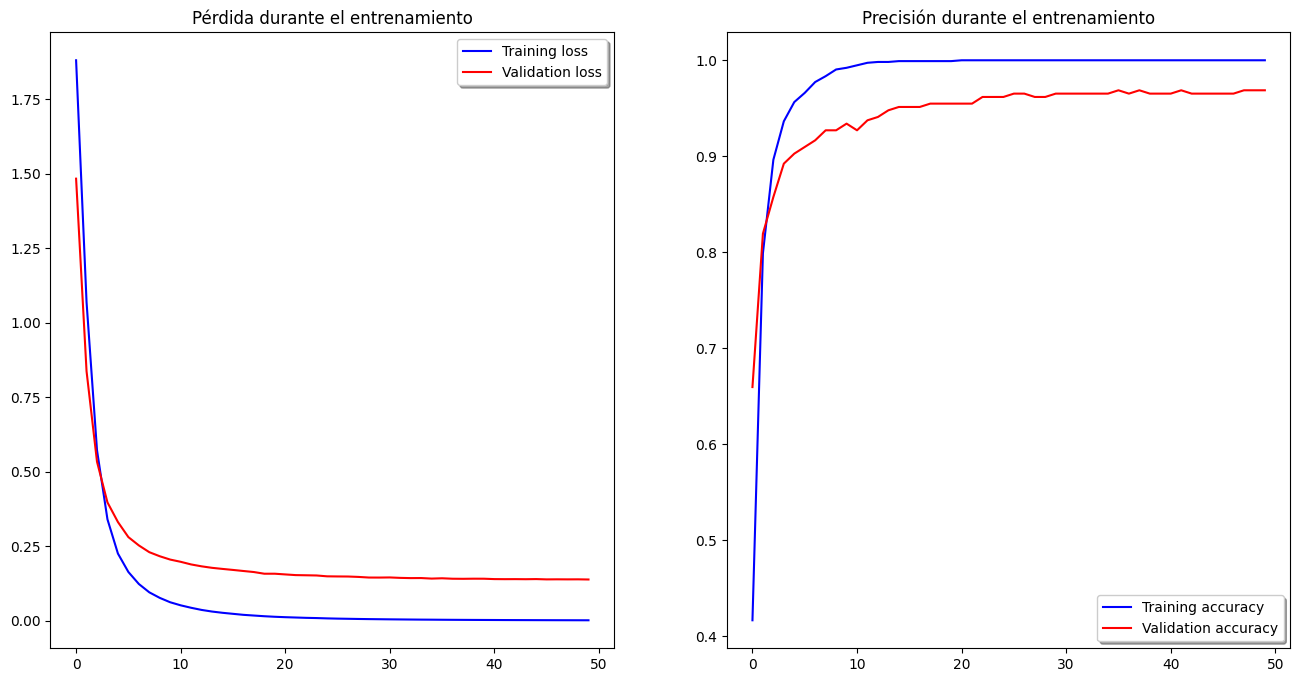

In [7]:
# === Definición del modelo ===
model = Sequential([
    # En este caso el dataset digits ya nos proporciona las imagenes de 8x8 aplanadas en arrays de 64, por lo que no es necesario aplanarlo
    Dense(64, activation='relu', input_shape=(64,)), # Importante ajustar las dimensiones de los datos de entrada 
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')  # 10 clases
])

# Mostrar resumen del modelo
model.summary()

# === Compilación y entrenamiento ===
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0, batch_size=32)

# === Evaluación ===
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión (Sequential): {accuracy:.4f}")

# === Gráficos del entrenamiento ===
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pérdida
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title('Pérdida durante el entrenamiento')

# Precisión
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Precisión durante el entrenamiento')

plt.show()

In [ ]:
# === Predicción sobre los datos de prueba ===
aciertos = 0
fallos = 0
predictions = model.predict(X_test, verbose=0)

for i in range(len(X_test)):
    # Entrada
    print(f"\nEntrada #{i}: {X_test[i]}")

    # Etiqueta real
    real = np.argmax(y_test[i])
    print(f"Etiqueta real: {real}")

    # Predicción
    pred = np.argmax(predictions[i])
    print(f"Etiqueta predicha: {pred}")

    # Verificación
    if pred == real:
        print("Correcto")
        aciertos += 1
    else:
        print("Incorrecto")
        fallos += 1

print(f"Nº de aciertos: {aciertos}")
print(f"Nº de fallos: {fallos}")


Entrada #0: [ 0.         -0.34169755 -1.08739895 -1.12538608  0.0255404  -1.03722581
 -0.40623424 -0.13101874 -0.06103492 -0.61725402 -1.15818106  1.00457847
 -0.49951228 -1.35608548 -0.52465505 -0.13336005 -0.04991522 -0.71864582
  0.3880473   0.66080203 -1.16010978 -1.27307852 -0.552537   -0.11409248
 -0.03733267 -0.77019159  0.97580609  0.18800378 -0.31029001 -0.26335663
 -0.35673487 -0.04573894  0.         -0.65547642  1.18448185  1.10043292
 -0.39454663  0.23493082  1.45911053  0.         -0.06519029 -0.520056
  1.09343535 -0.04578972 -1.23504336 -1.44673632  1.96737889 -0.09403434
 -0.03963009 -0.40241459  0.07963112  0.26344953 -1.80406231 -0.64238444
  2.49976424  1.91802442 -0.02638899 -0.30677646 -1.08427834 -0.70143968
  0.43903596  1.22242526  0.70096084 -0.19710003]
Etiqueta real: 6
Etiqueta predicha: 6
Correcto

Entrada #1: [ 0.         -0.34169755  1.20074205  0.97515053 -0.90953104 -1.03722581
 -0.40623424 -0.13101874 -0.06103492  1.25010184  1.04231191 -0.24679051
  0